In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

In [2]:
path = '/Users/johannemehren/filer/'
ds_obs = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')

ds_era5 = xr.open_dataset(path + 'FULL-ERA5.tp.monzonmean.2000-2018.nc4')
ds_erai = xr.open_dataset(path + 'erai.new_zonal.nc')

ds_era5_regrid = xr.open_dataset(path + 'gridfile_test.nc')
ds_erai_regrid = xr.open_dataset(path + 'erai_regrid_5x5.nc')


In [3]:
#era5_sl = ds_era5.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
#erai_sl = ds_erai.sel(lat=slice(20,-20), time=slice('2007-01-01', '2018-12-31'))

era5_sl_regrid = ds_era5_regrid.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
erai_sl_regrid = ds_erai_regrid.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))

obs_sl = ds_obs.resample(time='M').mean()
obs_l = obs_sl.sel(lat=slice(-20,20))



In [50]:
l = era5_sl_regrid.tpz - obs_l.LR_z.values
l.std()


<xarray.DataArray 'tpz' ()>
array(0.11821155, dtype=float32)

In [51]:
r = erai_sl_regrid.tpz - obs_l.LR_z.values
r.std()

<xarray.DataArray 'tpz' ()>
array(0.12705027, dtype=float32)

In [53]:
era5_sl_regrid.ctpz.std()

<xarray.DataArray 'ctpz' ()>
array(0.3806541, dtype=float32)

In [23]:
## Temperature mean (20S-20N), 2007-2018
t1 = era5_sl_regrid.mean(dim=('time','lat', 'lon'))
t2 = erai_sl_regrid.mean(dim=('time','lat', 'lon'))


obs_m = obs_l.mean(dim=('time','lat','lon'))

print(obs_)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    CP_T     float32 192.23189
    CP_z     float32 17.167078
    LR_T     float32 192.85196
    LR_z     float32 16.623056


In [8]:
col_obs = 'coral'

era5_1 = 'darkblue'
era5_2 = 'cornflowerblue'

erai_1 = 'darkgreen'
erai_2 = 'limegreen'

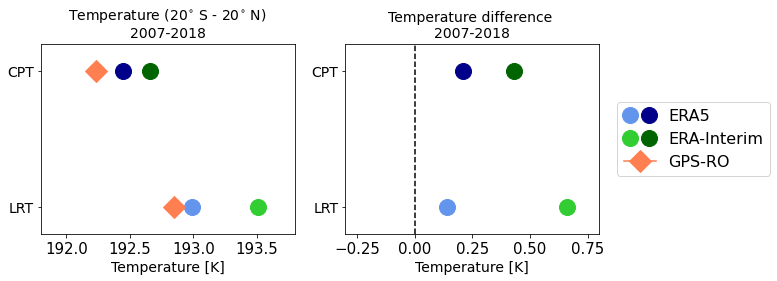

In [9]:
yar = np.linspace(0,1,2)
m= 16

fig, axs = plt.subplots(1,2,figsize=(10,3.5))

i1, = axs[0].plot(t1.tpt, yar[0], marker='o',ms=m, color=era5_2, label= 'ERA5 LRT')
i2, = axs[0].plot(t1.ctpt, yar[1], marker = 'o',ms=m, color=era5_1,label = 'ERA5 CPT')

i3, = axs[0].plot(t2.tpt, yar[0], marker='o',ms=m, color=erai_2, label='ERA-I LRT')
i4, = axs[0].plot(t2.ctpt, yar[1], marker='o', ms=m,color=erai_1,label='ERA-I CPT')

i5, = axs[0].plot(obs_m.LR_T, yar[0], marker='D',ms=m, color=col_obs, label = 'GPS-RO LRT')
i6, = axs[0].plot(obs_m.CP_T, yar[1], marker = 'D',ms=m, color=col_obs,label = 'GPS-RO CPT')

#l = axs[0].legend([(i1,i2),(i3,i4),(i5)], ['ERA5', 'ERA-Interim', 'GPS-RO'], numpoints=1,
#               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16, loc=7)

plt.legend([(i1,i2),(i3,i4),(i5)], ['ERA5', 'ERA-Interim', 'GPS-RO'], numpoints=1,
              handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16,bbox_to_anchor=(1.04,0.5), loc="center left")
axs[0].set_title('Temperature (20$^{\circ}$ S - 20$^{\circ}$ N) \n2007-2018', fontsize=14)

s1, = axs[1].plot(t1.tpt-obs_m.LR_T, yar[0], marker='o',ms=m, color=era5_2)
s2, = axs[1].plot(t1.ctpt-obs_m.CP_T, yar[1], marker = 'o',ms=m, color=era5_1)

s3, = axs[1].plot(t2.tpt-obs_m.LR_T, yar[0], marker='o',ms=m, color=erai_2)
s4, = axs[1].plot(t2.ctpt-obs_m.CP_T, yar[1], marker='o', ms=m,color=erai_1)

#l = axs[0].legend([(i1,i2),(i3,i4),(i5)], ['ERA5', 'ERA-Interim', 'GPS-RO'], numpoints=1,
#               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
axs[1].plot(np.zeros(11),np.linspace(-0.2,1.2,11), 'k--')

axs[1].set_title('Temperature difference \n2007-2018', fontsize=14)

axs[0].set_xlim(191.8, 193.8)
axs[1].set_xlim(-0.3, 0.8)
#plt.grid()
for ax in axs:
    ax.set_ylim(-0.2, 1.2)
    ax.set_yticks([0,1])
    ax.set_yticklabels(['LRT', 'CPT'], fontsize=14)
    ax.tick_params(axis="x", labelsize=15)
    ax.set_xlabel('Temperature [K]', fontsize=14)

#fig.savefig('fig/temp_mean_temp_diff_2020_lrt-cpt.png',dpi=300, bbox_inches='tight')


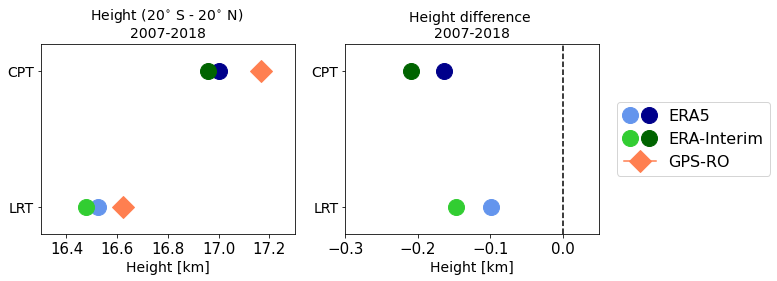

In [8]:
yar = np.linspace(0,1,2)
m= 16

fig, axs = plt.subplots(1,2,figsize=(10,3.5))

i1, = axs[0].plot(t1.tpz, yar[0], marker='o',ms=m, color=era5_2)
i2, = axs[0].plot(t1.ctpz, yar[1], marker = 'o',ms=m, color=era5_1)

i3, = axs[0].plot(t2.tpz, yar[0], marker='o',ms=m, color=erai_2)
i4, = axs[0].plot(t2.ctpz, yar[1], marker='o', ms=m,color=erai_1)

i5, = axs[0].plot(obs_m.LR_z, yar[0], marker='D',ms=m, color=col_obs)
i6, = axs[0].plot(obs_m.CP_z, yar[1], marker = 'D',ms=m, color=col_obs)

plt.legend([(i1,i2),(i3,i4),(i5)], ['ERA5', 'ERA-Interim', 'GPS-RO'], numpoints=1,
              handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16,bbox_to_anchor=(1.04,0.5), loc="center left")

axs[0].set_title('Height (20$^{\circ}$ S - 20$^{\circ}$ N) \n2007-2018', fontsize=14)

s1, = axs[1].plot(t1.tpz-obs_m.LR_z, yar[0], marker='o',ms=m, color=era5_2)
s2, = axs[1].plot(t1.ctpz-obs_m.CP_z, yar[1], marker = 'o',ms=m, color=era5_1)

s3, = axs[1].plot(t2.tpz-obs_m.LR_z, yar[0], marker='o',ms=m, color=erai_2)
s4, = axs[1].plot(t2.ctpz-obs_m.CP_z, yar[1], marker='o', ms=m,color=erai_1)

#l = axs[0].legend([(i1,i2),(i3,i4),(i5)], ['ERA5', 'ERA-Interim', 'GPS-RO'], numpoints=1,
#               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
axs[1].plot(np.zeros(11),np.linspace(-0.2,1.2,11), 'k--')

axs[1].set_title('Height difference \n2007-2018', fontsize=14)

axs[0].set_xlim(16.3, 17.3)
axs[1].set_xlim(-0.3, 0.05)
#plt.grid()
for ax in axs:
    ax.set_ylim(-0.2, 1.2)
    ax.set_yticks([0,1])
    ax.set_yticklabels(['LRT', 'CPT'], fontsize=14)
    ax.tick_params(axis="x", labelsize=15)
    ax.set_xlabel('Height [km]', fontsize=14)

#fig.savefig('fig/height_mean_alt_diff_2020_lrt-cpt.png',dpi=300, bbox_inches='tight')


In [54]:
## Lat dist


t1_lat = era5_sl.mean(dim=('time'), keep_attrs=True)
t2_lat = erai_sl.mean(dim=('time'), keep_attrs=True)

t1_lat_regrid = era5_sl_regrid.mean(dim=('time','lon'), keep_attrs=True)
t2_lat_regrid = erai_sl_regrid.mean(dim=('time', 'lon'), keep_attrs=True)

obs_m_lat = obs_l.mean(dim=('time', 'lon'), keep_attrs=True)

In [55]:
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.5

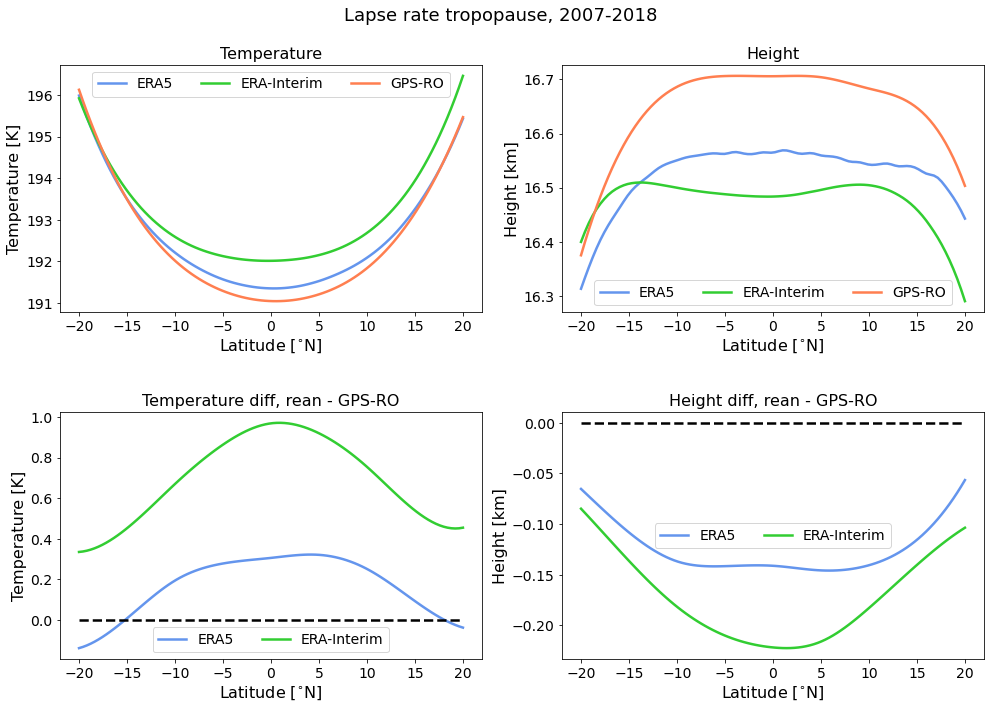

In [60]:
fig, axs = plt.subplots(2,2,figsize=(14,10))
fig.suptitle("Lapse rate tropopause, 2007-2018", fontsize=18)


x1 = t1_lat.lat
x2 = t2_lat.lat.sortby('lat')
x3 = obs_m_lat.lat

y1 = t1_lat.tpt
y2 = t2_lat.tpt
y3 = obs_m_lat.LR_T

y4 = t1_lat.tpz
y5 = t2_lat.tpz
y6 = obs_m_lat.LR_z

y7 = t1_lat_regrid.tpt - y3
y8 = t2_lat_regrid.tpt - y3

y9 = t1_lat_regrid.tpz - y6
y10 = t2_lat_regrid.tpz - y6


x_new = np.linspace(-20, 20, 100)

a_BSpline1 = make_interp_spline(x1, y1)
a_BSpline2 = make_interp_spline(x2, y2)
a_BSpline3 = make_interp_spline(x3, y3)
a_BSpline4 = make_interp_spline(x1, y4)
a_BSpline5 = make_interp_spline(x2, y5)
a_BSpline6 = make_interp_spline(x3, y6)

a_BSpline7 = make_interp_spline(x3, y7)
a_BSpline8 = make_interp_spline(x3, y8)
a_BSpline9 = make_interp_spline(x3, y9)
a_BSpline10 = make_interp_spline(x3, y10)

y_new1 = a_BSpline1(x_new)

axs[0,0].plot(x_new, y_new1, label = 'ERA5', color = era5_2)
axs[0,0].plot(x_new,a_BSpline2(x_new) ,label = 'ERA-Interim', color = erai_2)
axs[0,0].plot(x_new, a_BSpline3(x_new), label = 'GPS-RO', color = col_obs)
axs[0,0].set_ylabel('Temperature [K]', fontsize=16)
axs[0,0].set_title('Temperature', fontsize=16)


axs[0,1].plot(x_new, a_BSpline4(x_new), label = 'ERA5', color = era5_2)
axs[0,1].plot(x_new, a_BSpline5(x_new), label = 'ERA-Interim', color = erai_2)
axs[0,1].plot(x_new, a_BSpline6(x_new), label = 'GPS-RO', color = col_obs)
axs[0,1].set_ylabel('Height [km]', fontsize=16)
axs[0,1].set_title('Height', fontsize=16)

axs[1,0].plot(x_new, a_BSpline7(x_new), label = 'ERA5', color = era5_2)
axs[1,0].plot(x_new,a_BSpline8(x_new) ,label = 'ERA-Interim', color = erai_2)
axs[1,0].set_ylabel('Temperature [K]', fontsize=16)
axs[1,0].plot(x1, np.zeros(len(x1)), 'k--')
axs[1,0].set_title('Temperature diff, rean - GPS-RO', fontsize=16)


axs[1,1].plot(x_new, a_BSpline9(x_new), label = 'ERA5', color = era5_2)
axs[1,1].plot(x_new, a_BSpline10(x_new), label = 'ERA-Interim', color = erai_2)
axs[1,1].plot(x1, np.zeros(len(x1)), 'k--')
axs[1,1].set_ylabel('Height [km]', fontsize=16)
axs[1,1].set_title('Height diff, rean - GPS-RO', fontsize=16)


for j in range(0,2):
    for i in range(0,2):
        axs[j,i].legend(ncol=3, fontsize=14)
        axs[j,i].tick_params(axis="y", labelsize=14)
        axs[j,i].tick_params(axis="x", labelsize=14)
        axs[j,i].set_xlabel('Latitude [$^{\circ}$N]', fontsize=16)
        axs[j,i].set_xlim(-22,22)
        

fig.tight_layout()
fig.subplots_adjust(top=0.9, hspace = 0.4)

#fig.savefig('fig/lrt_t-z_latplot_2007-2018.png',dpi=300, bbox_inches='tight')

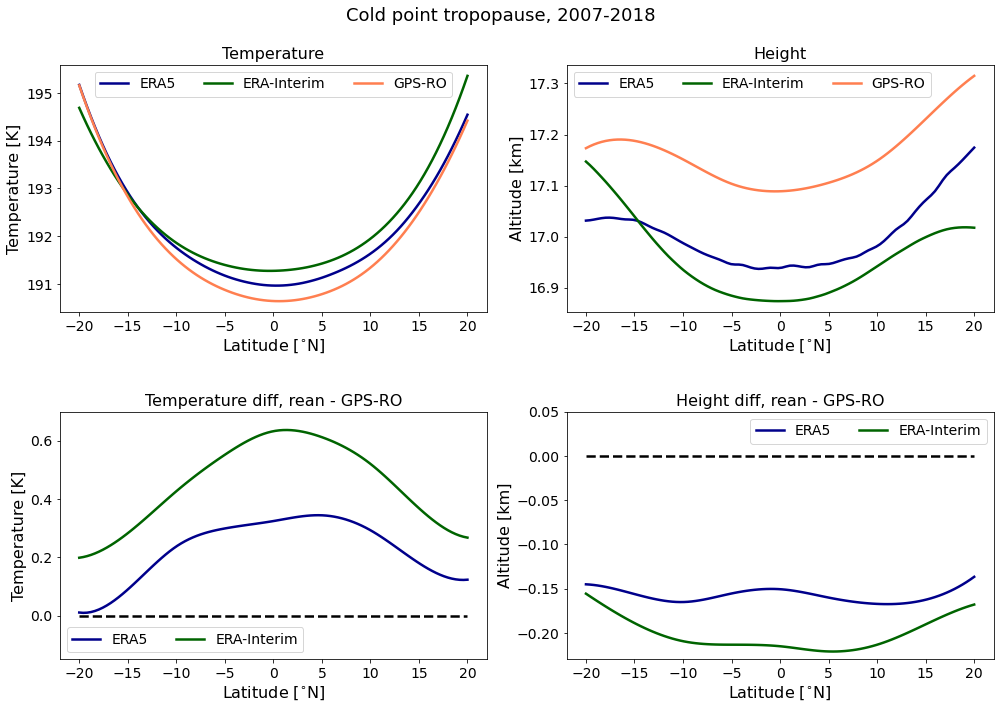

In [61]:
fig, axs = plt.subplots(2,2,figsize=(14,10))
fig.suptitle("Cold point tropopause, 2007-2018", fontsize=18)

x1 = t1_lat.lat
x2 = t2_lat.lat.sortby('lat')
x3 = obs_m_lat.lat

y1 = t1_lat.ctpt
y2 = t2_lat.ctpt
y3 = obs_m_lat.CP_T

y4 = t1_lat.ctpz
y5 = t2_lat.ctpz
y6 = obs_m_lat.CP_z

y7 = t1_lat_regrid.ctpt - y3
y8 =t2_lat_regrid.ctpt - y3

y9 = t1_lat_regrid.ctpz - y6
y10 = t2_lat_regrid.ctpz - y6


x_new = np.linspace(-20, 20, 100)

a_BSpline1 = make_interp_spline(x1, y1)
a_BSpline2 = make_interp_spline(x2, y2)
a_BSpline3 = make_interp_spline(x3, y3)
a_BSpline4 = make_interp_spline(x1, y4)
a_BSpline5 = make_interp_spline(x2, y5)
a_BSpline6 = make_interp_spline(x3, y6)

a_BSpline7 = make_interp_spline(x3, y7)
a_BSpline8 = make_interp_spline(x3, y8)
a_BSpline9 = make_interp_spline(x3, y9)
a_BSpline10 = make_interp_spline(x3, y10)



y_new1 = a_BSpline1(x_new)

axs[0,0].plot(x_new, y_new1, label = 'ERA5', color = era5_1)
axs[0,0].plot(x_new,a_BSpline2(x_new) ,label = 'ERA-Interim', color = erai_1)
axs[0,0].plot(x_new, a_BSpline3(x_new), label = 'GPS-RO', color = col_obs)
axs[0,0].set_ylabel('Temperature [K]', fontsize=16)
axs[0,0].set_title('Temperature', fontsize=16)


axs[0,1].plot(x_new, a_BSpline4(x_new), label = 'ERA5', color = era5_1)
axs[0,1].plot(x_new, a_BSpline5(x_new), label = 'ERA-Interim', color = erai_1)
axs[0,1].plot(x_new, a_BSpline6(x_new), label = 'GPS-RO', color = col_obs)
axs[0,1].set_ylabel('Altitude [km]', fontsize=16)
axs[0,1].set_title('Height', fontsize=16)

axs[1,0].plot(x_new, a_BSpline7(x_new), label = 'ERA5', color = era5_1)
axs[1,0].plot(x_new,a_BSpline8(x_new) ,label = 'ERA-Interim', color = erai_1)
axs[1,0].set_ylabel('Temperature [K]', fontsize=16)
axs[1,0].plot(x1, np.zeros(len(x1)), 'k--')
axs[1,0].set_title('Temperature diff, rean - GPS-RO', fontsize=16)

axs[1,1].plot(x_new, a_BSpline9(x_new), label = 'ERA5', color = era5_1)
axs[1,1].plot(x_new, a_BSpline10(x_new), label = 'ERA-Interim', color = erai_1)
axs[1,1].plot(x1, np.zeros(len(x1)), 'k--')
axs[1,1].set_ylabel('Altitude [km]', fontsize=16)
axs[1,1].set_title('Height diff, rean - GPS-RO', fontsize=16)


for j in range(0,2):
    for i in range(0,2):
        axs[j,i].legend(ncol=3, fontsize=14)
        axs[j,i].tick_params(axis="y", labelsize=14)
        axs[j,i].tick_params(axis="x", labelsize=14)
        axs[j,i].set_xlabel('Latitude [$^{\circ}$N]', fontsize=16)
        
axs[1,0].set_ylim(-0.15,0.7)
axs[1,1].set_ylim(-0.23, 0.05)
fig.tight_layout()
fig.subplots_adjust(top=0.9, hspace = 0.4)

#fig.savefig('fig/ctp_t-z_latplot_2007-2018.png',dpi=300, bbox_inches='tight')

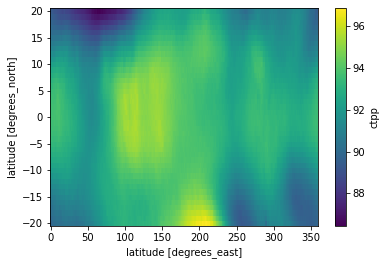

In [28]:
era5_sl.ctpp.mean(dim='time').plot()

In [26]:
erai_sl.ctpp.mean(dim='time').min()

<xarray.DataArray 'ctpp' ()>
array(87.45367, dtype=float32)

In [27]:
era5_sl.tpp.mean(dim='time').min()

<xarray.DataArray 'tpp' ()>
array(94.988495, dtype=float32)